In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sympy import *
from cvxopt import matrix,solvers

In [2]:
X=pd.DataFrame({'x1':[0,0,1,1],'x2':[0,1,0,1],'ω':[0,0,0,1]}) 
Y=X.copy()
Y.insert(2,'x3',[1,1,1,1])
Y.loc[Y['ω']==1,['x1','x2','x3']]=-1*Y.loc[Y['ω']==1]
print(Y)

   x1  x2  x3  ω
0   0   0   1  0
1   0   1   1  0
2   1   0   1  0
3  -1  -1  -1  1


In [3]:
x1=Symbol('x1')
x2=Symbol('x2')
y=np.asarray([x1,x2,1])
x1w0=X.loc[X['ω']==0,['x1']]
x2w0=X.loc[X['ω']==0,['x2']]
x1w1=X.loc[X['ω']==1,['x1']]
x2w1=X.loc[X['ω']==1,['x2']]

perceptron

In [4]:
a=np.array([0,0,0])
eta=1
n=4   
i=0
loop=0
itr=0
A=[]
while(loop<n-1):
     yi=np.asarray(Y[['x1','x2','x3']].iloc[i])
     print("a"+str(itr)+"^Ty"+str(i),"=",a@yi.T)
     if(a@yi.T<=0):
          a=a+eta*yi
          loop=-1
          print("a"+str(itr+1),"=","a"+str(itr),"+ y"+str(i),"=",a)
          A.append(a)
          itr=itr+1
     else:
          loop=loop+1
     i=(i+1)%n
print("a =",a)

a0^Ty0 = 0
a1 = a0 + y0 = [0 0 1]
a1^Ty1 = 1
a1^Ty2 = 1
a1^Ty3 = -1
a2 = a1 + y3 = [-1 -1  0]
a2^Ty0 = 0
a3 = a2 + y0 = [-1 -1  1]
a3^Ty1 = 0
a4 = a3 + y1 = [-1  0  2]
a4^Ty2 = 1
a4^Ty3 = -1
a5 = a4 + y3 = [-2 -1  1]
a5^Ty0 = 1
a5^Ty1 = 0
a6 = a5 + y1 = [-2  0  2]
a6^Ty2 = 0
a7 = a6 + y2 = [-1  0  3]
a7^Ty3 = -2
a8 = a7 + y3 = [-2 -1  2]
a8^Ty0 = 2
a8^Ty1 = 1
a8^Ty2 = 0
a9 = a8 + y2 = [-1 -1  3]
a9^Ty3 = -1
a10 = a9 + y3 = [-2 -2  2]
a10^Ty0 = 2
a10^Ty1 = 0
a11 = a10 + y1 = [-2 -1  3]
a11^Ty2 = 1
a11^Ty3 = 0
a12 = a11 + y3 = [-3 -2  2]
a12^Ty0 = 2
a12^Ty1 = 0
a13 = a12 + y1 = [-3 -1  3]
a13^Ty2 = 0
a14 = a13 + y2 = [-2 -1  4]
a14^Ty3 = -1
a15 = a14 + y3 = [-3 -2  3]
a15^Ty0 = 3
a15^Ty1 = 1
a15^Ty2 = 0
a16 = a15 + y2 = [-2 -2  4]
a16^Ty3 = 0
a17 = a16 + y3 = [-3 -3  3]
a17^Ty0 = 3
a17^Ty1 = 0
a18 = a17 + y1 = [-3 -2  4]
a18^Ty2 = 1
a18^Ty3 = 1
a18^Ty0 = 4
a18^Ty1 = 2
a = [-3 -2  4]


a0 = [0 0 0] 

a1 = [0 0 1]

a2 = [-1 -1  0]
Decision Boundary: -x1 - x2 = 0


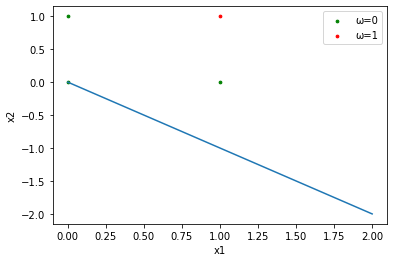

a3 = [-1 -1  1]
Decision Boundary: -x1 - x2 + 1 = 0


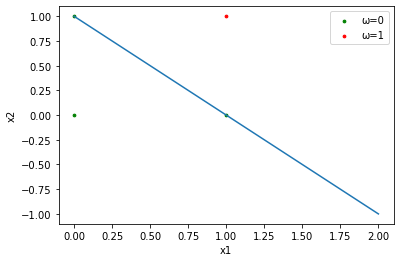

a4 = [-1  0  2]
Decision Boundary: 2 - x1 = 0


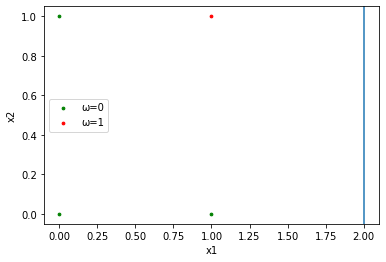

a5 = [-2 -1  1]
Decision Boundary: -2*x1 - x2 + 1 = 0


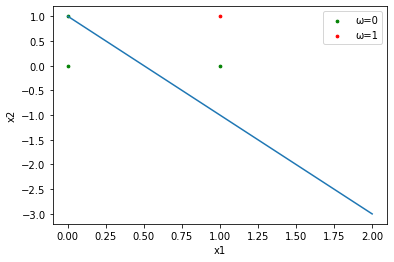

a6 = [-2  0  2]
Decision Boundary: 2 - 2*x1 = 0


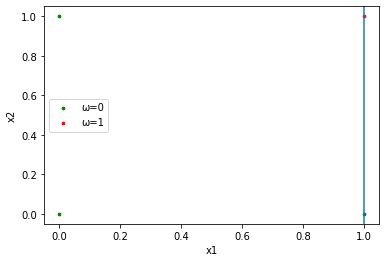

a7 = [-1  0  3]
Decision Boundary: 3 - x1 = 0


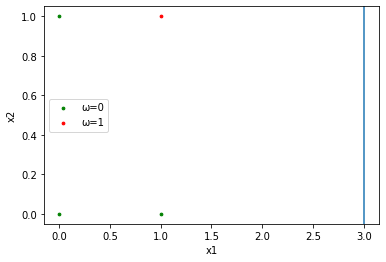

a8 = [-2 -1  2]
Decision Boundary: -2*x1 - x2 + 2 = 0


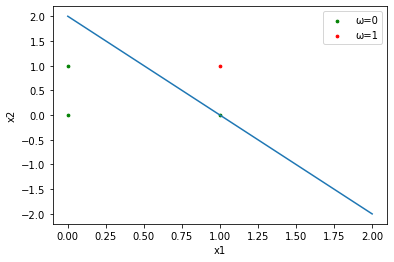

a9 = [-1 -1  3]
Decision Boundary: -x1 - x2 + 3 = 0


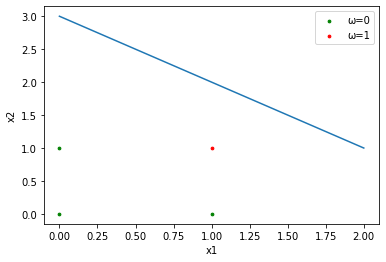

a10 = [-2 -2  2]
Decision Boundary: -2*x1 - 2*x2 + 2 = 0


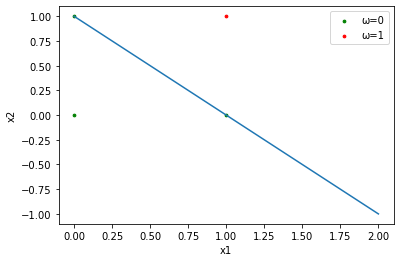

a11 = [-2 -1  3]
Decision Boundary: -2*x1 - x2 + 3 = 0


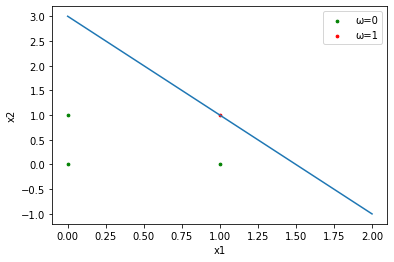

a12 = [-3 -2  2]
Decision Boundary: -3*x1 - 2*x2 + 2 = 0


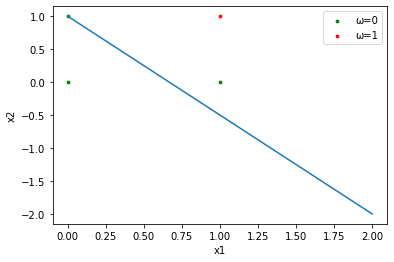

a13 = [-3 -1  3]
Decision Boundary: -3*x1 - x2 + 3 = 0


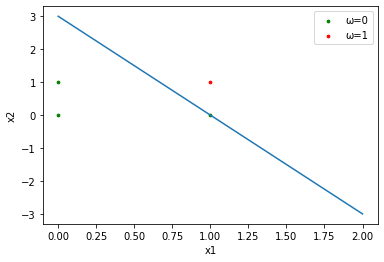

a14 = [-2 -1  4]
Decision Boundary: -2*x1 - x2 + 4 = 0


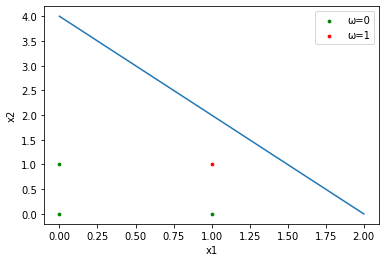

a15 = [-3 -2  3]
Decision Boundary: -3*x1 - 2*x2 + 3 = 0


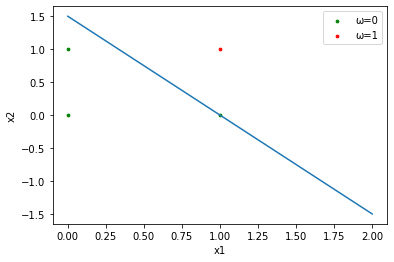

a16 = [-2 -2  4]
Decision Boundary: -2*x1 - 2*x2 + 4 = 0


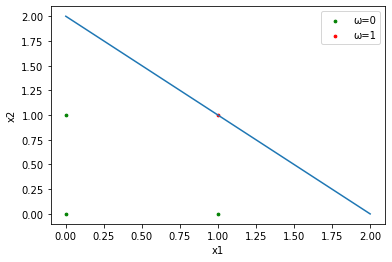

a17 = [-3 -3  3]
Decision Boundary: -3*x1 - 3*x2 + 3 = 0


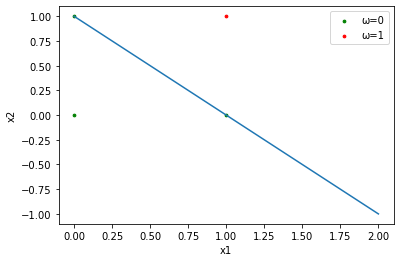

a18 = [-3 -2  4]
Decision Boundary: -3*x1 - 2*x2 + 4 = 0


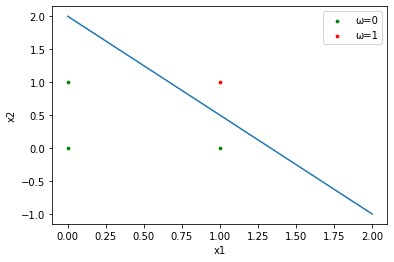

In [5]:
print("a0 =",np.asarray([0,0,0]),"\n")
for i in range(len(A)):
     print("a"+str(i+1),"=",A[i])
     if(A[i][1]!=0):
          print("Decision Boundary:",A[i]@y.T,"= 0")
          g=solve(A[i]@y.T,x2,dict=True)
          xx=np.linspace(0,2,100)
          yy=np.asarray([lambdify(x1,g[0][x2])(val) for val in xx])
          plt.plot(xx,yy.T)
          plt.scatter(x1w0,x2w0,label="ω=0",color="green",marker=".",s=30)
          plt.scatter(x1w1,x2w1,label="ω=1",color="red",marker=".",s=30) 
          plt.xlabel('x1')
          plt.ylabel('x2')
          plt.legend()
          plt.show()
     elif(A[i][0]!=0):
          print("Decision Boundary:",A[i]@y.T,"= 0")
          g=solve(A[i]@y.T,x1,dict=True)
          plt.axvline(x=g[0][x1])
          plt.scatter(x1w0,x2w0,label="ω=0",color="green",marker=".",s=30)
          plt.scatter(x1w1,x2w1,label="ω=1",color="red",marker=".",s=30)
          plt.xlabel('x1')
          plt.ylabel('x2') 
          plt.legend()
          plt.show()
     else:
          print("")

SVM

In [6]:
n=4
X=X[['x1','x2']].to_numpy()
Y=Y[['x3']].to_numpy()
H=np.dot(Y*X,(Y*X).T)
H=H.astype('float')
q=np.repeat([-1.0],n)[..., None]
A=Y.reshape(1,-1)
A=A.astype('float')
b=0.0
G=np.negative(np.eye(n))
h=np.zeros(n)
P=matrix(H)
q=matrix(q)
G=matrix(G)
h=matrix(h)
A=matrix(A)
b=matrix(b)
sol=solvers.qp(P,q,G,h,A,b)
alpha=np.array(sol['x'])
print("alpha =",alpha)
W=np.dot((Y*alpha).T,X)[0]
print("W =",W)
S=(alpha>1e-5).flatten()
b=np.mean(Y[S]-np.dot(X[S],W.reshape(-1,1)))
print("b =",b)

     pcost       dcost       gap    pres   dres
 0: -1.7500e+00 -4.2500e+00  8e+00  2e+00  2e+00
 1: -3.6653e+00 -4.3941e+00  1e+00  3e-01  3e-01
 2: -3.9945e+00 -4.0256e+00  3e-02  2e-15  1e-15
 3: -3.9999e+00 -4.0003e+00  3e-04  1e-15  3e-16
 4: -4.0000e+00 -4.0000e+00  3e-06  9e-16  7e-16
Optimal solution found.
alpha = [[2.74146027e-07]
 [2.00000036e+00]
 [2.00000036e+00]
 [4.00000100e+00]]
W = [-2.00000064 -2.00000064]
b = 3.0000008516308303


Decision Boundary: -2.00000063872312*x1 - 2.00000063872312*x2 + 3.00000085163083 = 0


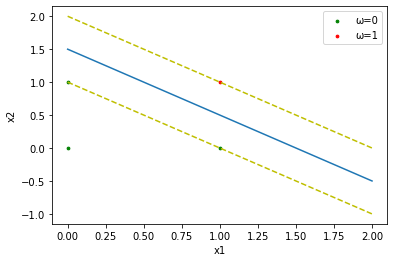

In [7]:
a=np.append(W,b)
print("Decision Boundary:",a@y.T,"= 0")
xx=np.linspace(0,2,100)
m=-W[0]/W[1]
yy=m*xx-(b)/W[1]
margin=1/np.sqrt(np.sum(W**2))
yy_neg=yy-np.sqrt(1+m**2)*margin
yy_pos=yy+np.sqrt(1+m**2)*margin
plt.plot(xx,yy)
plt.plot(xx,yy_neg,"y--")
plt.plot(xx,yy_pos,"y--")
plt.scatter(x1w0,x2w0,label="ω=0",color="green",marker=".",s=30)
plt.scatter(x1w1,x2w1,label="ω=1",color="red",marker=".",s=30) 
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()